# CC1002 Sesion Activa: UnMutable vs Mutable 


 - Jérémy Barbay, jeremy@barbay.cl

## Temas abordados

1. [ ] Estructuras de datos `mutable` y `unmutable`
1. [ ] Uso de la parte mutable del modulo `estructura.py`
1. [ ] efectos de borde (aliases)

## Objetivos de Aprendisaje




1. [ ] Diferencia entre unmutable y mutable
1. [ ] borrar en lista con estructuras de datos `mutable`
1. [ ] intereses y peligros de los **efectos de borde**

## Instrucciones



Para realizar la actividad en clase, deben hacer una copia de este archivo y llenar los vacíos con sus explicaciones, sus implementaciones y sus pruebas mientras las sesiones de trabajo en "breakout group". El codigo siguiente puede ser util: 


###  Estructura.py

In [1]:
import sys
from collections import namedtuple
from keyword import iskeyword


def create_unmutable(name: str, fields: str) -> None:
    """Creates an unmutable C like structure given the name of the 
    structure and it's fields. The fields are a string separated by
    a blank space, one word is one field on the structure.

    Arguments:
        name {str} -- [The name of the structure]
        fields {str} -- [A string containing the fields of the structure]

    Returns:
        None -- [Adds the new structure to the global variables of the workspace]
    """
    frame = sys._getframe(1)
    frame.f_globals[name] = namedtuple(name, fields)


def validateMutable(name: str, fields: list) -> None:
    """Raise error if the name of the struct or the fields are incorrect

    Arguments:
        name {str} -- [the name of the struct]
        fields {str} -- [the fields of the struct]

    Returns:
        None -- [description]
    """
    if not fields:
        raise ValueError('Mutable structures need at least one field')
    struct_variable_names = list(name) + fields
    for field_name in struct_variable_names:
        if iskeyword(field_name):
            raise ValueError(
                f'Name of struct and field names cannot be a keyword: {field_name}')
        if field_name[0].isdigit():
            raise ValueError(
                f'Name of struct or field names cannot start with a number {field_name}')
    seen_names = set()
    for field_name in fields:
        if field_name.startswith('_'):
            raise ValueError(
                f'Mutable field names cannot start with an underscore: {field_name}')
        if field_name in seen_names:
            raise ValueError(
                f'Duplicate field names in the struct {field_name}')
        seen_names.add(field_name)


def createStructClass(className: str, classAttr: str) -> str:
    """Creates a multiple line string which text is a new class
    declaration

    Arguments:
        className {str} -- [The name of the new class on the string]
        classAttr {str} -- [A string containing the names of properties on the class, must be
                            separated with a blank space between each propertie name]

    Returns:
        str -- [The class string which will be executed]
    """
    attributes = classAttr.split(" ")
    validateMutable(className, attributes)
    # Defining some raw process text to put on the class
    raw_init_body = map(lambda x: f'self.{x}={x}', attributes)
    raw_self_attributes = map(lambda x: f'self.{x}', attributes)
    raw_repr_text = map(lambda x: str(x)+'={}', attributes)
    raw_eqn_method = map(lambda x: f'self.{x}==other.{x}', attributes)
    # Making the class methods arguments and body
    initArguments = ', '.join(attributes)
    initBody = '; '.join(raw_init_body)
    eqnBody = ' and '.join(raw_eqn_method)
    repr_attr_body = ', '.join(raw_repr_text)
    repr_format_params = ','.join(raw_self_attributes)
    # The class string
    classStr = f"""
class {className}(object):
    def __init__(self,{initArguments}):
        {initBody}
    def __eq__(self,other):
        return isinstance(other, self.__class__) and {eqnBody}
    def __ne__(self,other):
        return not self == other
    def __repr__(self):
        return '{className}({repr_attr_body})'.format({repr_format_params})
    """
    return classStr


def create_mutable(name: str, fields: str) -> None:
    """Creates a new mutable C like structures, containing aliasing and
    changing of the values.

    Arguments:
        name {str} -- [The name of the mutable structure to create]
        fields {str} -- [The fields of the mutable structure, separated by a blank space]

    Returns:
        None -- [Adds the structure to the global variables]
    """
    class_definition = createStructClass(name, fields)
    exec(class_definition)
    frame = sys._getframe(1)
    frame.f_globals[name] = locals()[name]


# API for the course ...
crear = create_unmutable
mutable = create_mutable


### Lista.py

In [3]:

# Diseno de la estructura
# lista : valor (any = cualquier tipo) siguiente (lista)
crear("lista", "valor siguiente")

# identificador para listas vacias
listaVacia = None

# crearLista: any lista -> lista
# devuelve una lista cuya cabeza es valor
# y la cola es resto
def crearLista(valor, resto):
        return lista(valor, resto)

# cabeza: lista -> any
# devuelve la cabeza de una lista (un valor)
def cabeza(lista): 
	return lista.valor

# cola: lista -> lista
# devuelve la cola de una lista (una lista)
def cola(lista):
	return lista.siguiente

# vacia: lista -> bool
# devuelve True si la lista esta vacia
def vacia(lista):
	return lista == listaVacia


# Tests

test_lista = lista(1, lista(2, lista(3, listaVacia)))

assert cabeza(test_lista) == 1
assert cabeza(cola(test_lista)) == 2
assert cabeza(cola(cola(test_lista))) == 3
assert cola(cola(test_lista)) == lista(3, listaVacia)

assert vacia(listaVacia)
assert not vacia(test_lista)
assert vacia(cola(cola(cola(test_lista))))


### Draw(x)

In [4]:
import graphviz
from IPython.display import display_svg, SVG, display
def draw(x):
  display = graphviz.Digraph()
  display.format = 'svg'
  def drawrecursive(x):
    if type(x) == int or type(x) == str: 
      display.node(repr(x),str(x))
    else:
      display.node(repr(x),str(x[0]))      
      for field in x[1:]:
       if field != None:
        drawrecursive(field)
        display.edge(repr(x),repr(field))
  drawrecursive(x)
  svg = display.pipe().decode('utf-8')
  return SVG(svg)


---

# ACTIVIDADES

## Ejercicio: int [5 mns]

Escribe un codigo corto para verificar que los int se tratan como tipos de datos basicos, y no como referencias.

In [5]:
entero = 76
copiaOAlias = entero
# Su codigo aqui

# Que piensan que va a pasar?
print(entero,copiaOAlias)

76 76


### EJEMPLO DE SOLUCION

In [6]:
entero = 76
copiaOAlias = entero
# Su codigo aqui
entero = 0
# Que piensan que va a pasar?
print(entero,copiaOAlias)

0 76


## Ejercicio: Strings [5 mns]

Escribe un codigo corto para verificar que los strings se tratan como tipos de datos basicos, y no como referencias.

In [7]:
string = "basketball"
copiaOAlias = string
# Su codigo aqui

# Que piensan que va a pasar?
print(string,copiaOAlias)

basketball basketball


### EJEMPLO DE SOLUCION

In [8]:
string = "basketball"
copiaOAlias = string
string = "baseball"
print(string,copiaOAlias)

baseball basketball


## Ejercicio: Mutable [5 mns]

Escribe un codigo corto para verificar que una estructura Mutable se trata como una referencia, y no como un tipo de datos basicos.

In [11]:

create_mutable("nota", "nombre nota")

barbara = nota("Barbara", 4)
copiaOAlias = barbara
# Su codigo aqui

# Que piensan que va a pasar aqui?
print(barbara,copiaOAlias)

nota(nombre=Barbara, nota=4) nota(nombre=Barbara, nota=4)


### EJEMPLO DE SOLUCION 

In [13]:
create_mutable("nota", "nombre nota")

barbara = nota("Barbara", 4)
copiaOAlias = barbara
# Su codigo aqui
copiaOAlias.nombre = "Jeremy"
copiaOAlias.nota = 3
# Que piensan que va a pasar aqui?
print(barbara,copiaOAlias)

nota(nombre=Jeremy, nota=3) nota(nombre=Jeremy, nota=3)


## Ejercicio: Lista unmutable [5mns]

Crea una lista de enteros (non mutable, con el modulo Lista) de al minimo 6 elementos. 

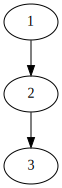

In [14]:
l = lista(1, lista(2, lista(3, None)))
draw(l)

### EJEMPLO DE SOLUCION 

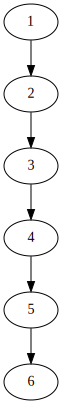

In [15]:
l = lista(1, lista(2, lista(3, lista(4, lista(5, lista(6,listaVacia))))))
draw(l)

## Ejercicio: borrarUnMutable [15 mns]

Programa una funcion `borra(v,l)` cual busca y borra la primera instancia del entero `v` en la lista **unmutable** `l`, devolviendo la lista que no contiene esta instancia de `v`:

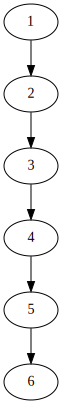

In [16]:
def borraUnMutable(v,l):
  if vacia(l):
    return None
  else:
    return l # A corregir

newLista = borraUnMutable(5,l)
draw(newLista)

Que piensa que paso con `l`?

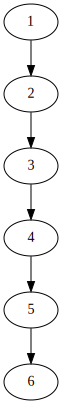

In [17]:
draw(l)

### EJEMPLO DE SOLUCION 

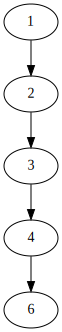

In [18]:
def borraUnMutable(v,l):
  if vacia(l):
    return None
  else:
    if cabeza(l) == v:
      return cola(l)
    else:
      return lista(cabeza(l),borraUnMutable(v,cola(l)))

newList = borraUnMutable(5,l)
draw(newList)

Que piensa que paso con `l`?

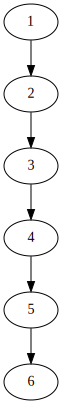

In [19]:
draw(l)

## Ejercicio: Lista Mutable [5 mns]

Crea una estructura de datos mutable de lista con al minimo 6 elementos:

In [20]:
create_mutable("ListaMutable", "cabeza cola")

lista_mutable = ListaMutable(1, ListaMutable(2, ListaMutable(3,None)))
print(lista_mutable)

ListaMutable(cabeza=1, cola=ListaMutable(cabeza=2, cola=ListaMutable(cabeza=3, cola=None)))


### EJEMPLO DE SOLUCION 

In [21]:
create_mutable("ListaMutable", "cabeza cola")

lista_mutable = ListaMutable(1, ListaMutable(2, ListaMutable(3, ListaMutable(4, ListaMutable(5,ListaMutable(6,None))))))
print(lista_mutable)

ListaMutable(cabeza=1, cola=ListaMutable(cabeza=2, cola=ListaMutable(cabeza=3, cola=ListaMutable(cabeza=4, cola=ListaMutable(cabeza=5, cola=ListaMutable(cabeza=6, cola=None))))))


## Ejercicio: borraMutable [10mns]

Progama la funcion `borraMutable)(v,l)` cual borra la primera instancia de un valor `v` en una lista **mutable** `l`:

In [22]:
def borraMutable(v,l):
  if vacia(l):
    return None
  else:
    # Su codigo aqui
    return l

newList = borraMutable(5,lista_mutable)
print(newList)

ListaMutable(cabeza=1, cola=ListaMutable(cabeza=2, cola=ListaMutable(cabeza=3, cola=ListaMutable(cabeza=4, cola=ListaMutable(cabeza=5, cola=ListaMutable(cabeza=6, cola=None))))))


### EJEMPLO DE SOLUCION 

In [23]:
def borraMutable(v,l):
  if vacia(l):
    return None
  else:
    if l.cabeza == v:
      return l.cola
    else:
      l.cola = borraMutable(v,l.cola)
      return l

newList = borraMutable(5,lista_mutable)
print(newList)

ListaMutable(cabeza=1, cola=ListaMutable(cabeza=2, cola=ListaMutable(cabeza=3, cola=ListaMutable(cabeza=4, cola=ListaMutable(cabeza=6, cola=None)))))



---

# ANEXO

## Ejercicio: borraAllMutable [10mns]

Progama la funcion `borraAllMutable(v,l)` cual borra **todas** las instancias de un valor `v` en una lista **mutable** `l`:

In [ ]:
def borraAllMutable(v,l):
  if vacia(l):
    return None
  else:
    # Su codigo aqui
    return l

newList = borraAllMutable(5,lista_mutable)
print(newList)

ListaMutable(cabeza=1, cola=ListaMutable(cabeza=2, cola=ListaMutable(cabeza=3, cola=ListaMutable(cabeza=4, cola=ListaMutable(cabeza=6, cola=None)))))


### EJEMPLO DE SOLUCION 

In [24]:
def borraAllMutable(v,l):
  if vacia(l):
    return None
  else:
    if l.cabeza == v:
      return borraAllMutable(v,l.cola)
    else:
      l.cola = borraAllMutable(v,l.cola)
      return l

newList = borraAllMutable(5,lista_mutable)
print(newList)

ListaMutable(cabeza=1, cola=ListaMutable(cabeza=2, cola=ListaMutable(cabeza=3, cola=ListaMutable(cabeza=4, cola=ListaMutable(cabeza=6, cola=None)))))
